In [2]:
df <- read.csv('howpop_train.csv')

In [6]:
head(df)

url,domain,post_id,published,author,flow,polling,content_len,title,comments,favs,views,votes_plus,votes_minus,views_lognorm,favs_lognorm,comments_lognorm
https://habrahabr.ru/post/18284/,habrahabr.ru,18284,2008-01-01 18:19:00,@Tapac,develop,False,4305,Новогодний подарок блоггерам — WordPress 2.3.2,0,0,236,0,0,-0.7926869,-1.3440750,-2.43687131
https://habrahabr.ru/post/18285/,habrahabr.ru,18285,2008-01-01 18:30:00,@DezmASter,design,False,7344,"Сумасшедшие яйца, или сервис для отслеживания посетителей",1,1,353,1,0,-0.4852142,-0.8319459,-1.87319311
https://habrahabr.ru/post/18286/,habrahabr.ru,18286,2008-01-01 18:34:00,@DezmASter,design,False,8431,"Сумасшедшие яйца, или сервис для отслеживания посетителей",47,72,1200,45,5,0.4460899,1.7940228,0.57465638
https://habrahabr.ru/post/18291/,habrahabr.ru,18291,2008-01-02 01:32:00,@Taoorus,design,False,5662,"Сглаживание шрифтов, и субпиксельная отрисовка",102,36,5700,72,3,1.6274691,1.3000496,1.16737523
https://geektimes.ru/post/18294/,geektimes.ru,18294,2008-01-02 14:34:00,@dennydo,,False,3706,Почему мне не нравится iPhone,230,6,1400,73,15,1.3623970,0.9610940,2.02035591
https://habrahabr.ru/post/18295/,habrahabr.ru,18295,2008-01-02 16:14:00,@lvea,develop,False,3171,Mobile2.0 Всеобщая доступность,22,1,192,9,2,-0.9500752,-0.8251494,0.01655529


In [8]:
library(anytime)
mydate = anytime(df$published)

In [10]:
mydate = as.POSIXlt(mydate)

In [11]:
df$year = as.numeric(format(mydate, "%Y"))
df$month = as.numeric(format(mydate, "%m"))
df$day = as.numeric(format(mydate, "%d"))
df$hour = as.numeric(format(mydate, "%H"))
df$weekday = weekdays(mydate, abbreviate = F)

In [12]:
str(df)

'data.frame':	134137 obs. of  22 variables:
 $ url             : Factor w/ 134137 levels "https://geektimes.ru/company/1cloud/blog/240716/",..: 92679 92683 92684 92686 12698 92695 12702 92724 121835 92728 ...
 $ domain          : Factor w/ 2 levels "geektimes.ru",..: 2 2 2 2 1 2 1 2 2 2 ...
 $ post_id         : int  18284 18285 18286 18291 18294 18295 18306 18311 31352 18314 ...
 $ published       : Factor w/ 130291 levels "2008-01-01 18:19:00",..: 1 2 3 4 5 6 7 8 9 10 ...
 $ author          : Factor w/ 22078 levels "","@0000168",..: 18691 5005 5005 18689 4862 11582 293 1620 10787 11582 ...
 $ flow            : Factor w/ 7 levels "","admin","design",..: 4 3 3 3 1 4 1 7 4 4 ...
 $ polling         : Factor w/ 2 levels "False","True": 1 1 1 1 1 1 1 1 1 1 ...
 $ content_len     : int  4305 7344 8431 5662 3706 3171 435 3291 1953 3712 ...
 $ title           : Factor w/ 133628 levels " "," — а я вчера пересматривал «Доктора Хауса» на своем окне!",..: 54187 90544 90544 83582 70376 120677 12071

## 1. В каком месяце (и какого года) было больше всего публикаций?
    *март 2016
    *март 2015 - Correct!
    *апрель 2015
    *апрель 2016

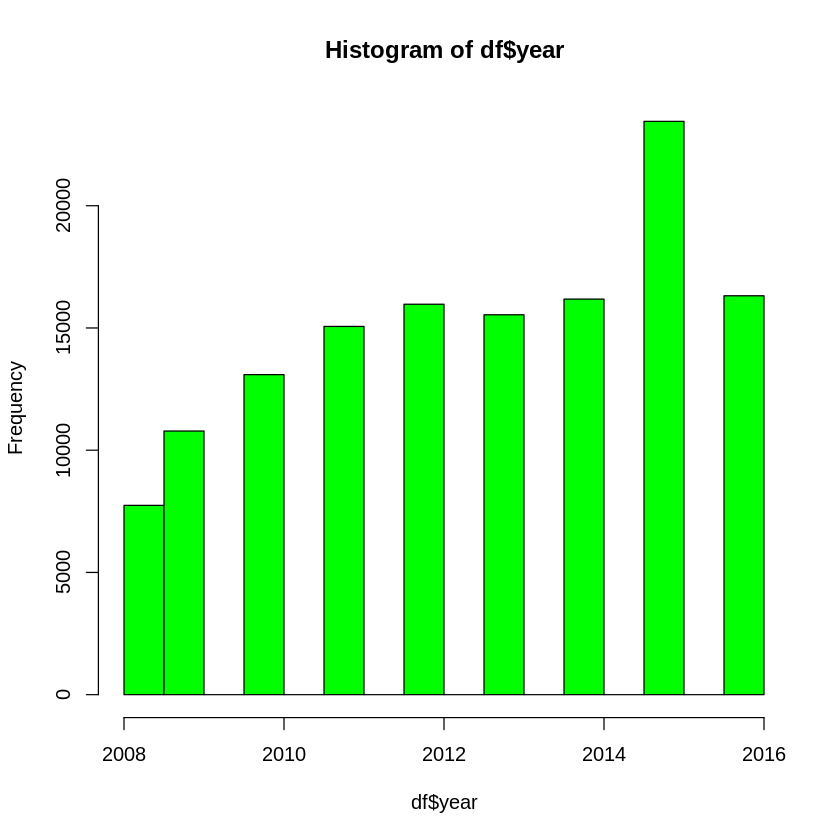

In [13]:
hist(df$year, col='green')

In [14]:

df_2015 <- subset(df, df$year == 2015, select = c('month', 'title', 'day', 'hour', 'domain', 'weekday'))

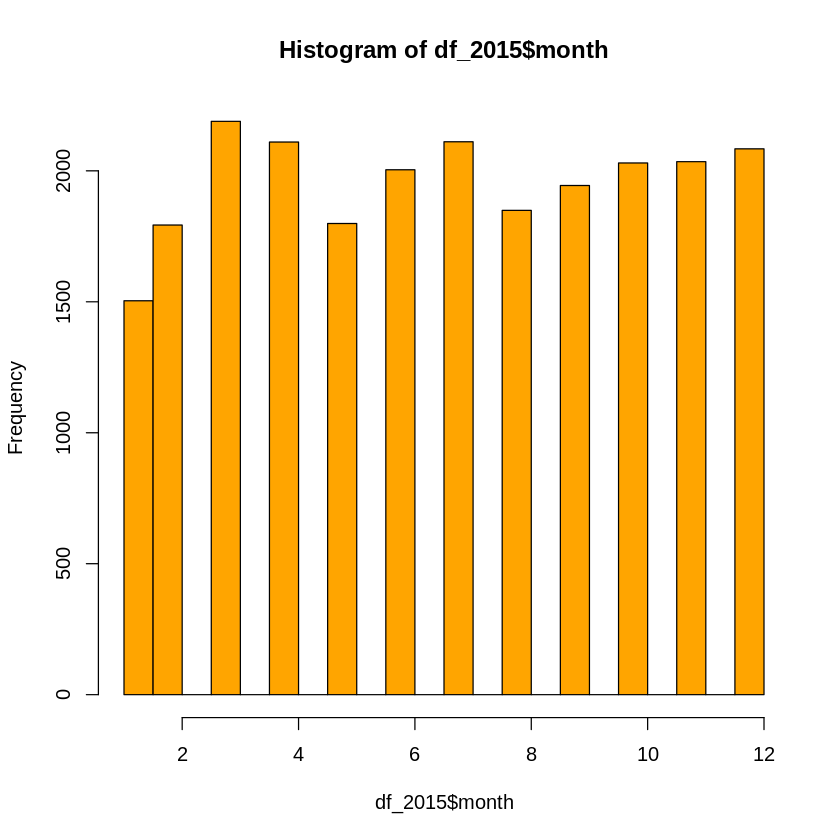

In [15]:
hist(df_2015$month, col='orange')

## 2. Проанализируйте публикации в месяце из предыдущего вопроса
Выберите один или несколько вариантов:

    Один или несколько дней сильно выделяются из общей картины
    На хабре всегда больше статей, чем на гиктаймсе
    По субботам на гиктаймс и на хабрахабр публикуют примерно одинаковое число статей

In [16]:
df_2015_03 <- subset(df_2015, df_2015$month == 3, select = c('month', 'title', 'day', 'hour', 'domain', 'weekday'))

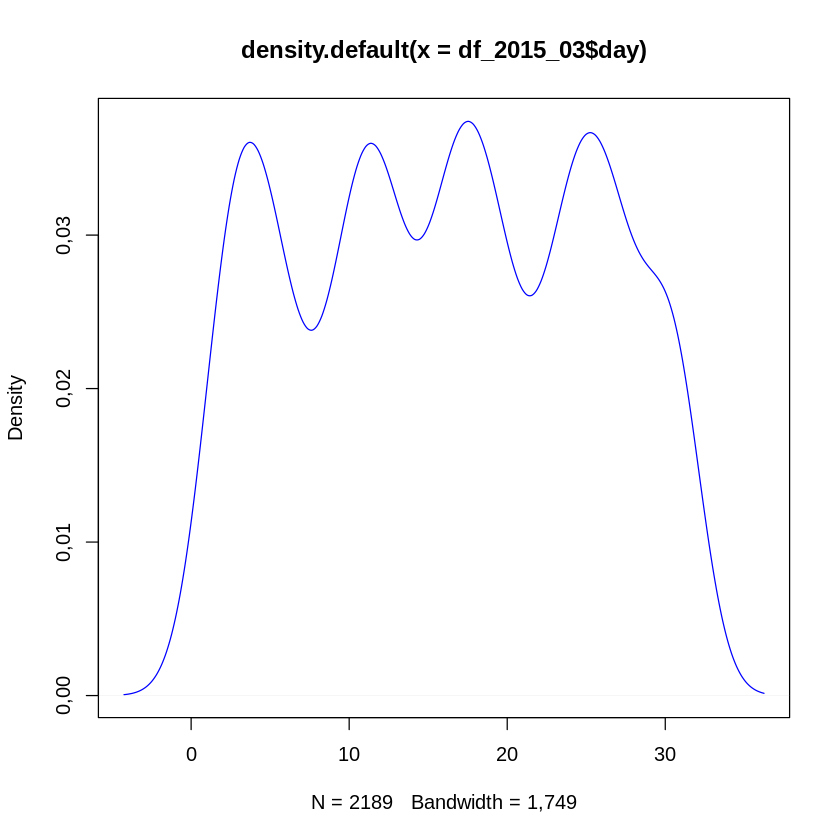

In [17]:
d <- density(df_2015_03$day)
plot(d, col='blue')

In [18]:
head(df_2015_03)

,month,title,day,hour,domain,weekday
97667,3,Введение в разработку слайд-шоу на JavaScript,1,0,habrahabr.ru,Воскресенье
97668,3,Дайджест KolibriOS #7: как мы зиму перезимовали,1,0,habrahabr.ru,Воскресенье
97669,3,"9 марта компания Apple сделает то, что не делала в течение последних 5 лет",1,7,habrahabr.ru,Воскресенье
97670,3,Context Model Pattern via Aero Framework,1,7,habrahabr.ru,Воскресенье
97671,3,Заполнение текстовых шаблонов данными на основе модели. Реализация на .NET с использованием динамических функций в байт-коде (IL),1,10,habrahabr.ru,Воскресенье
97672,3,Философия программирования 5 — Колибри и Реактос,1,12,habrahabr.ru,Воскресенье


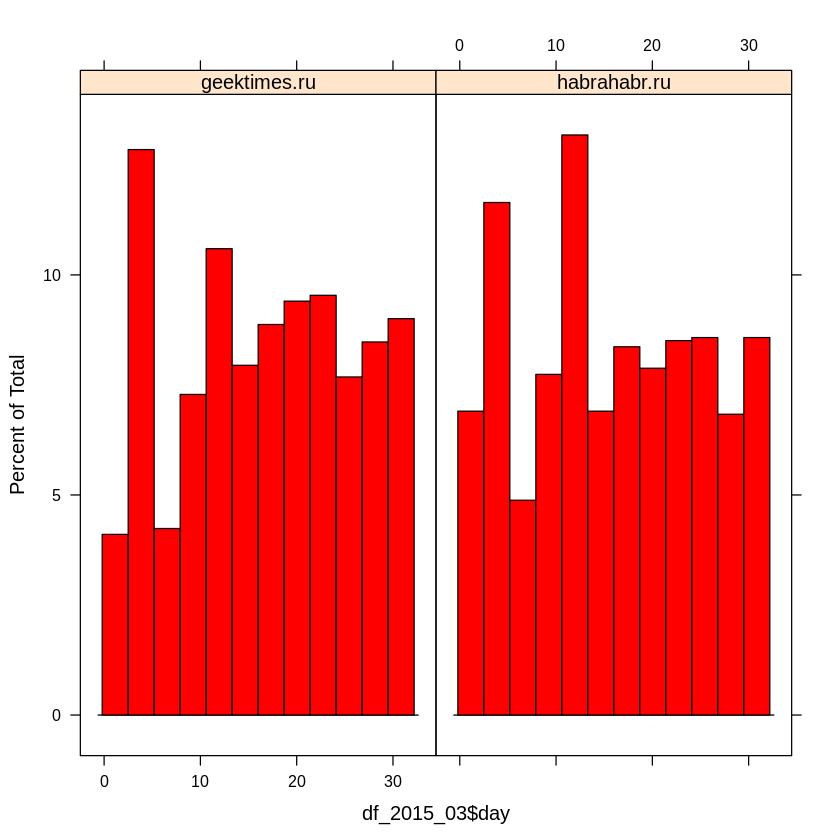

In [20]:
library(lattice)
histogram( ~ df_2015_03$day | df_2015_03$domain, col='red')

In [46]:
sats <- subset(df_2015_03, df_2015_03$weekday == 'Saturday', select = c('day', 'hour', 'domain'))

In [47]:
sats

day,hour,domain


## 3. Когда лучше всего публиковать статью?
    Больше всего просмотров набирают статьи, опубликованные в 12 часов дня
    У опубликованных в 10 утра постов больше всего комментариев
    Больше всего просмотров набирают статьи, опубликованные в 6 часов утра - Correct!
    Максимальное число комментариев на гиктаймсе набрала статья, опубликованная в 9 часов вечера
    На хабре дневные статьи комментируют чаще, чем вечерние

In [25]:
library(dplyr)
mean_views <- (df %>% group_by(hour) %>%
 summarise(mean = mean(views)))


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [26]:
max(mean_views)

[1] 22024,66

In [28]:
mean_views[mean_views['mean'] == max(mean_views), 'hour']

hour
5


In [29]:
library(dplyr)
mean_comms <- (df %>% group_by(hour) %>%
 summarise(mean = mean(comments)))

In [30]:
max(mean_comms)

[1] 53,93569

In [31]:
mean_comms[mean_comms['mean'] == max(mean_comms), 'hour']

hour
4


In [32]:
geek <- subset(df, df$domain == 'geektimes.ru', select = c('comments', 'hour', 'domain'))


In [33]:
library(dplyr)
most_comms <- (geek %>% group_by(hour) %>%
 summarise(max = max(comments)))

In [34]:
max(most_comms)

[1] 2266

In [35]:
most_comms[most_comms['max'] == max(most_comms), 'hour']

hour
3


In [36]:
habr <- subset(df, df$domain == 'habrahabr.ru', select = c('comments', 'hour', 'domain'))

In [37]:
library(dplyr)
mean_comms_h <- (habr %>% group_by(hour) %>%
 summarise(mean = mean(comments)))

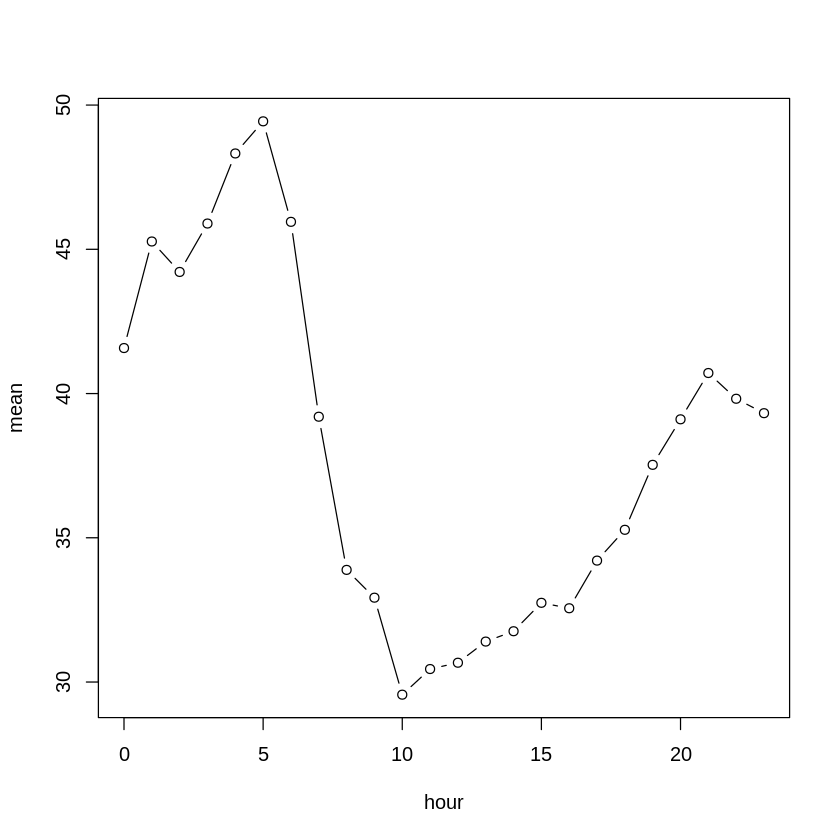

In [39]:
plot(mean_comms_h, type='b')

## 4. Кого из топ-20 авторов чаще всего минусуют?
    @Mordatyj
    @Mithgol - Correct!
    @alizar
    @ilya42

In [40]:
morda <- subset(df, df$author == '@Mordatyj', select = c('comments', 'hour', 'domain', 'votes_minus'))
morda[is.na(morda)] <- 0
round(mean(morda$votes_minus)) # @Mordatyj

[1] 7

In [41]:
mithgol <- subset(df, df$author == '@Mithgol', select = c('comments', 'hour', 'domain', 'votes_minus'))
mithgol[is.na(mithgol)] <- 0
round(mean(mithgol$votes_minus)) # @Mithgol

[1] 20

In [42]:
alizar <- subset(df, df$author == '@alizar', select = c('comments', 'hour', 'domain', 'votes_minus'))
alizar[is.na(alizar)] <- 0
round(mean(alizar$votes_minus)) # @alizar

[1] 8

In [43]:
ilya42 <- subset(df, df$author == '@ilya42', select = c('comments', 'hour', 'domain', 'votes_minus'))
ilya42[is.na(ilya42)] <- 0
round(mean(ilya42$votes_minus)) # @ilya42

[1] 6

## 5. Сравните субботы и понедельники
Правда ли, что по субботам авторы пишут в основном днём, а по понедельникам — в основном вечером?

In [44]:
saturdays <- subset(df, df$weekday == 'Saturday', select = c('hour'))

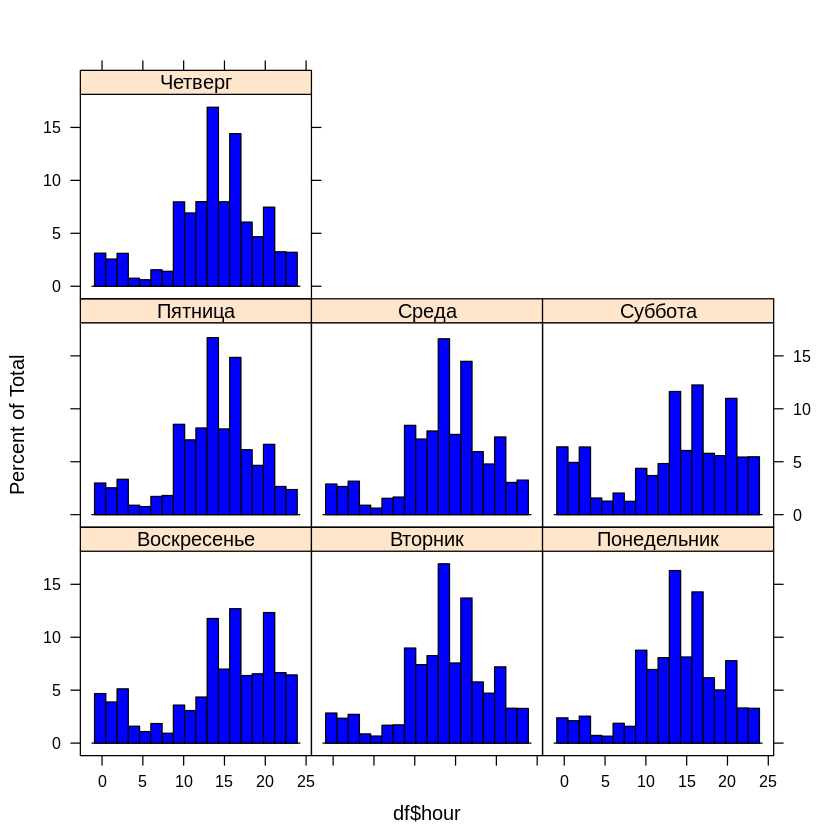

In [45]:
library(lattice)
histogram( ~ df$hour | df$weekday, col='blue')

#### Ответ: нет